* we are going to perform 'EXPLORATORY DATA ANALYSIS' on 'DMart Store Transactions'

# DMart STORE TRANSACTION ANALYSIS

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Read Dataset

In [2]:
df=pd.read_excel('DMart.xlsx')

#### checking the data set 

In [3]:
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07/01/2015,08/01/2015,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,13/06/2015,15/06/2015,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,15/02/2015,17/02/2015,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,12/05/2015,14/05/2015,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,12/05/2015,13/05/2015,-24.0300,7,22.23,86838


#### checking the dimensionality of the DataFrame

In [4]:
df.shape

(1952, 25)

#### lets check the summary of our DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1952 non-null   int64  
 1   Order Priority        1952 non-null   object 
 2   Discount              1952 non-null   float64
 3   Unit Price            1952 non-null   float64
 4   Shipping Cost         1952 non-null   float64
 5   Customer ID           1952 non-null   int64  
 6   Customer Name         1952 non-null   object 
 7   Ship Mode             1952 non-null   object 
 8   Customer Segment      1952 non-null   object 
 9   Product Category      1952 non-null   object 
 10  Product Sub-Category  1952 non-null   object 
 11  Product Container     1952 non-null   object 
 12  Product Name          1952 non-null   object 
 13  Product Base Margin   1952 non-null   float64
 14  Country               1952 non-null   object 
 15  Region               

#### Statistical information of numerical columns

In [6]:
df.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,19916.479508,0.048975,109.079221,12.968151,1735.376537,0.515707,51534.769467,114.793859,12.944672,985.828832,82365.924180
std,5957.595627,0.031378,393.481301,17.414631,991.078006,0.136647,29362.828420,1141.112387,13.871565,2559.900167,19042.295798
min,64.000000,0.000000,1.140000,0.490000,3.000000,0.350000,1001.000000,-16476.838000,1.000000,2.250000,359.000000
25%,19121.000000,0.020000,6.480000,3.230000,875.000000,0.380000,28560.000000,-84.485400,5.000000,58.807500,86767.750000
50%,21164.500000,0.050000,20.990000,6.150000,1738.000000,0.530000,48765.500000,1.476450,10.000000,202.395000,88376.000000
75%,23483.250000,0.080000,100.972500,14.362500,2578.250000,0.590000,78550.000000,116.201575,16.000000,802.945000,89957.000000
max,26389.000000,0.210000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,9228.225600,167.000000,45737.330000,91586.000000


#### checking all the columns dtypes

In [7]:
df.dtypes

Row ID                    int64
Order Priority           object
Discount                float64
Unit Price              float64
Shipping Cost           float64
Customer ID               int64
Customer Name            object
Ship Mode                object
Customer Segment         object
Product Category         object
Product Sub-Category     object
Product Container        object
Product Name             object
Product Base Margin     float64
Country                  object
Region                   object
State or Province        object
City                     object
Postal Code               int64
Order Date               object
Ship Date                object
Profit                  float64
Quantity ordered new      int64
Sales                   float64
Order ID                  int64
dtype: object

#### we can see that the Order Date and Ship Date are in object data type we should change them to  datetime format

In [8]:
# Converting Order Date and Ship Date object to datetime data type
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format = '%d/%m/%Y')
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


In [9]:
df.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Country                         object
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

### DATA CLEANING

#### checking null values

In [10]:
df.isnull()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1948,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1949,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1950,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### total sum of null values

In [11]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Country                 0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

### there are no null values in the DMart  dataset . Hence no need to modify dataset

#### checking the columns of the dataset

In [12]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Country', 'Region',
       'State or Province', 'City', 'Postal Code', 'Order Date', 'Ship Date',
       'Profit', 'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [13]:
df['Country']

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
1947    United States
1948    United States
1949    United States
1950    United States
1951    United States
Name: Country, Length: 1952, dtype: object

In [14]:
df['Country'].unique()

array(['United States'], dtype=object)

#### Here we can see that all the data is from US country so, we don't required the country column in the dataset 

#### Droping the Country column

In [15]:
df=df.drop('Country',axis=1)

In [16]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [17]:
df.shape

(1952, 24)

# 



In [18]:
# Checking the unique Order Priority, Ship Mode,Customer Segment,Product Category,Product Container,Region
print('Order Priority: ', df['Order Priority'].unique())
print('Ship Mode: ',df['Ship Mode'].unique())
print('Customer Segment: ',df['Customer Segment'].unique())
print('Product Category: ',df['Product Category'].unique())
print('Product Container: ',df['Product Container'].unique())
print('Region: ',df['Region'].unique())
print('Product Sub-Category: ',df['Product Sub-Category'].unique())

Order Priority:  ['High' 'Not Specified' 'Critical' 'Medium' 'Low' 'Critical ']
Ship Mode:  ['Express Air' 'Delivery Truck' 'Regular Air']
Customer Segment:  ['Corporate' 'Home Office' 'Small Business' 'Consumer']
Product Category:  ['Office Supplies' 'Furniture' 'Technology']
Product Container:  ['Wrap Bag' 'Jumbo Drum' 'Small Pack' 'Small Box' 'Medium Box' 'Jumbo Box'
 'Large Box']
Region:  ['West' 'East' 'Central' 'South']
Product Sub-Category:  ['Pens & Art Supplies' 'Chairs & Chairmats' 'Office Furnishings'
 'Rubber Bands' 'Envelopes' 'Telephones and Communication'
 'Office Machines' 'Paper' 'Binders and Binder Accessories' 'Labels'
 'Storage & Organization' 'Tables' 'Scissors, Rulers and Trimmers'
 'Computer Peripherals' 'Bookcases' 'Appliances' 'Copiers and Fax']


# 

### univariate analysis 

#### Ship Mode  

#### unique values in Ship Mode varible

In [19]:
df['Ship Mode'].unique()

array(['Express Air', 'Delivery Truck', 'Regular Air'], dtype=object)

#### counting total values in different unique values

In [20]:
df['Ship Mode'].value_counts()

Regular Air       1437
Delivery Truck     275
Express Air        240
Name: Ship Mode, dtype: int64

In [21]:
df['Ship Mode'].value_counts(normalize=True)

Regular Air       0.736168
Delivery Truck    0.140881
Express Air       0.122951
Name: Ship Mode, dtype: float64

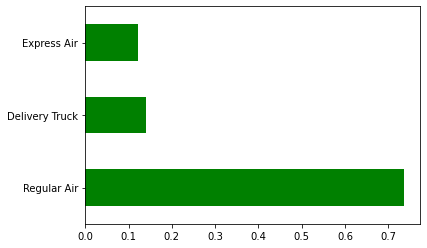

In [22]:
df['Ship Mode'].value_counts(normalize=True).plot.barh(color = 'green')
plt.show(500,100)

# 

#### Region

In [23]:
df['Region'].value_counts()

Central    566
East       474
West       470
South      442
Name: Region, dtype: int64

In [24]:
df['Region'].value_counts(normalize=True)

Central    0.289959
East       0.242828
West       0.240779
South      0.226434
Name: Region, dtype: float64

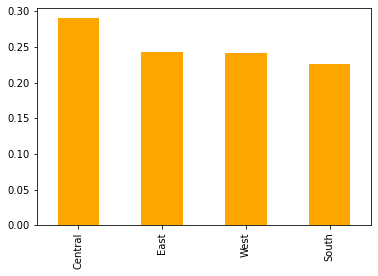

In [25]:
df['Region'].value_counts(normalize=True).plot.bar(color='orange')
plt.show(500,100)

# 

In [26]:
df['Product Category'].value_counts()

Office Supplies    1071
Technology          481
Furniture           400
Name: Product Category, dtype: int64

In [27]:
df['Product Category'].value_counts(normalize=True)

Office Supplies    0.548668
Technology         0.246414
Furniture          0.204918
Name: Product Category, dtype: float64

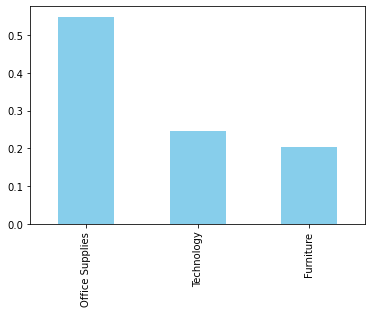

In [28]:
df['Product Category'].value_counts(normalize=True).plot.bar(color='skyblue')
plt.show(500,100)

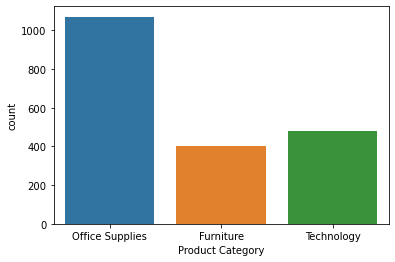

In [29]:
plt.figure()
sns.countplot(x="Product Category",data=df)
plt.show()

# 

In [30]:
df['Product Sub-Category'].unique()

array(['Pens & Art Supplies', 'Chairs & Chairmats', 'Office Furnishings',
       'Rubber Bands', 'Envelopes', 'Telephones and Communication',
       'Office Machines', 'Paper', 'Binders and Binder Accessories',
       'Labels', 'Storage & Organization', 'Tables',
       'Scissors, Rulers and Trimmers', 'Computer Peripherals',
       'Bookcases', 'Appliances', 'Copiers and Fax'], dtype=object)

In [31]:
df['Product Sub-Category'].value_counts()

Paper                             284
Binders and Binder Accessories    200
Telephones and Communication      194
Office Furnishings                185
Computer Peripherals              174
Pens & Art Supplies               161
Storage & Organization            130
Appliances                        100
Office Machines                    95
Chairs & Chairmats                 92
Tables                             80
Labels                             71
Envelopes                          55
Bookcases                          43
Scissors, Rulers and Trimmers      36
Rubber Bands                       34
Copiers and Fax                    18
Name: Product Sub-Category, dtype: int64

In [32]:
df['Product Sub-Category'].value_counts(normalize=True)

Paper                             0.145492
Binders and Binder Accessories    0.102459
Telephones and Communication      0.099385
Office Furnishings                0.094775
Computer Peripherals              0.089139
Pens & Art Supplies               0.082480
Storage & Organization            0.066598
Appliances                        0.051230
Office Machines                   0.048668
Chairs & Chairmats                0.047131
Tables                            0.040984
Labels                            0.036373
Envelopes                         0.028176
Bookcases                         0.022029
Scissors, Rulers and Trimmers     0.018443
Rubber Bands                      0.017418
Copiers and Fax                   0.009221
Name: Product Sub-Category, dtype: float64

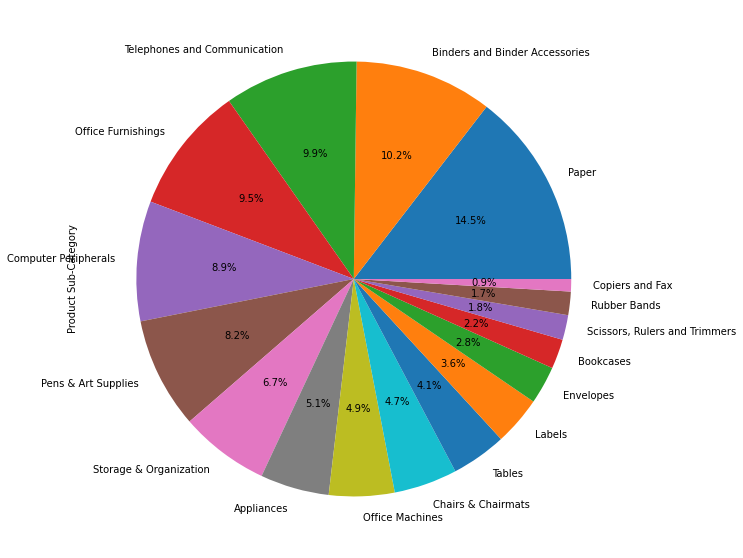

In [33]:
plt.figure(figsize=(12,10))
df['Product Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

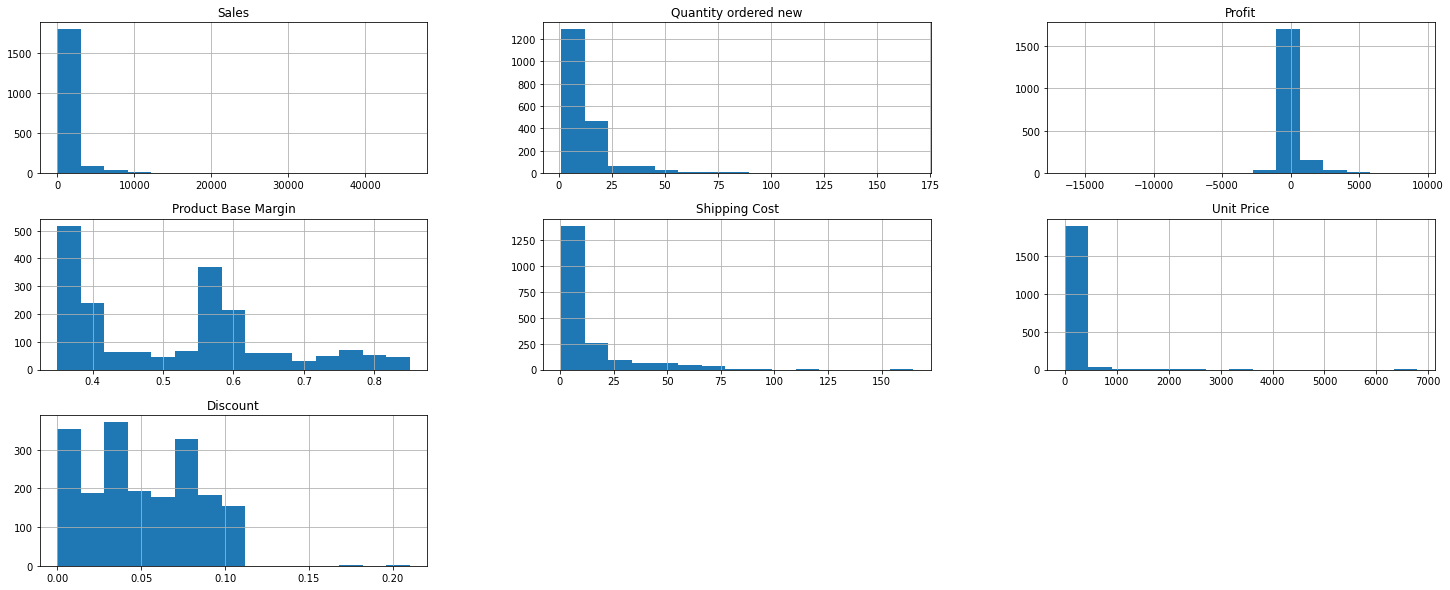

In [34]:
# Histogram for numerical data
numerical_cols = ['Sales', 'Quantity ordered new', 'Profit', 'Product Base Margin', 'Shipping Cost', 'Unit Price', 
                  'Discount']
df[numerical_cols].hist(bins=15, figsize=(25, 10), layout=(3, 3));

## BIVARIATE ANALYSIS

In [35]:
df.corr()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
Row ID,1.000000,0.018215,-0.004427,-0.016027,0.064071,-0.000040,0.033578,-0.038468,-0.568939,-0.258827,0.918497
Discount,0.018215,1.000000,-0.008202,0.039908,0.014534,0.019367,-0.025247,-0.061821,-0.009398,-0.030287,0.016719
Unit Price,-0.004427,-0.008202,1.000000,0.198793,-0.008717,0.030411,0.016086,-0.182067,-0.072472,0.443509,0.003292
Shipping Cost,-0.016027,0.039908,0.198793,1.000000,-0.016805,0.363116,-0.033903,0.002177,-0.009735,0.322133,-0.014691
Customer ID,0.064071,0.014534,-0.008717,-0.016805,1.000000,-0.031441,-0.096491,0.008852,-0.027582,-0.015412,0.069118
Product Base Margin,-0.000040,0.019367,0.030411,0.363116,-0.031441,1.000000,0.003612,-0.055996,0.002041,0.108342,0.009925
Postal Code,0.033578,-0.025247,0.016086,-0.033903,-0.096491,0.003612,1.000000,0.033033,-0.015628,-0.019699,0.052141
Profit,-0.038468,-0.061821,-0.182067,0.002177,0.008852,-0.055996,0.033033,1.000000,0.118363,0.364258,-0.031008
Quantity ordered new,-0.568939,-0.009398,-0.072472,-0.009735,-0.027582,0.002041,-0.015628,0.118363,1.000000,0.303099,-0.589746
Sales,-0.258827,-0.030287,0.443509,0.322133,-0.015412,0.108342,-0.019699,0.364258,0.303099,1.000000,-0.270939


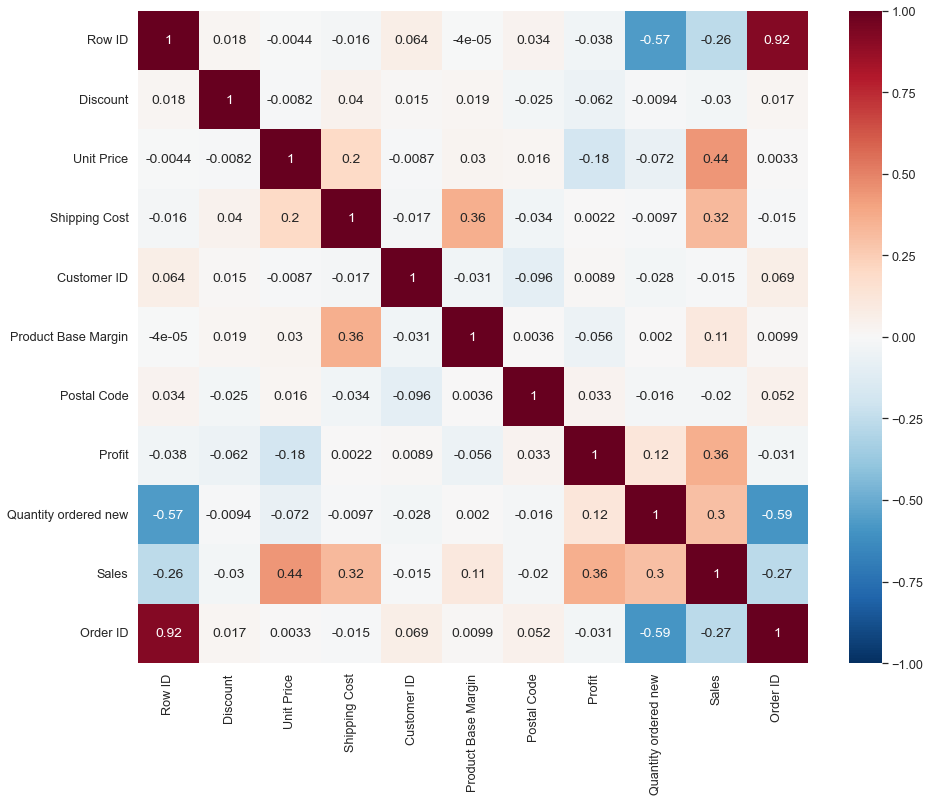

In [36]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,12))
sns.heatmap(
    df.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

Text(0.5, 1.0, 'Ship Mode with Order Priority')

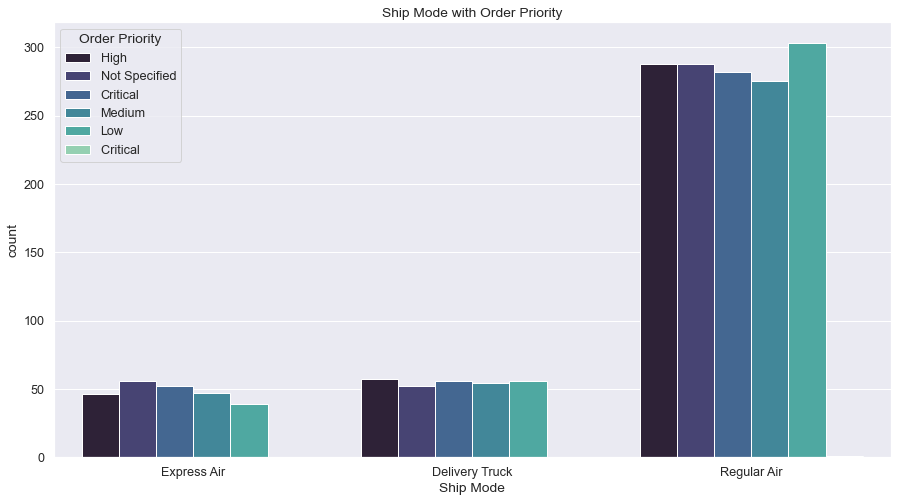

In [37]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data = df, x = 'Ship Mode', hue = 'Order Priority', palette = 'mako')
plt.title('Ship Mode with Order Priority')

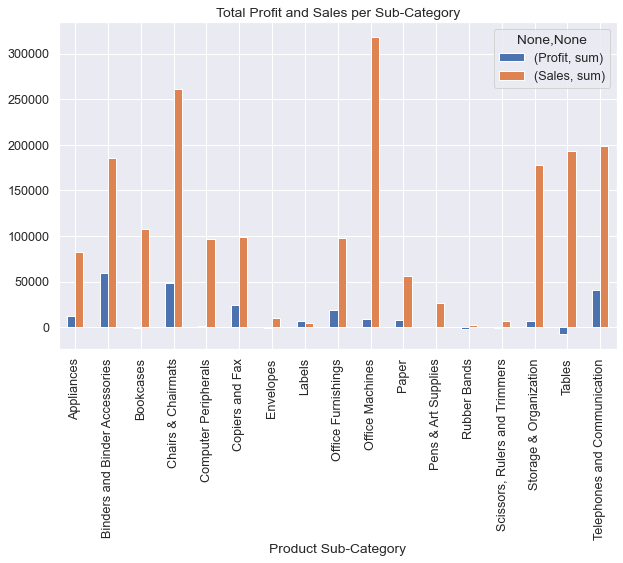

In [38]:
df.groupby('Product Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(10, 6))
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

In [52]:
df.groupby('Product Category').describe()['Profit'].T

Product Category,Furniture,Office Supplies,Technology
count,400.000000,1071.000000,481.000000
mean,148.123615,83.590112,156.555419
std,1243.728723,693.005411,1712.133260
min,-13706.464000,-2196.684000,-16476.838000
25%,-163.025800,-56.350000,-111.720000
50%,3.255000,-1.071200,15.371400
75%,236.475450,47.568600,374.625000
max,6095.860200,9228.225600,8798.183100


<AxesSubplot:xlabel='Profit', ylabel='Density'>

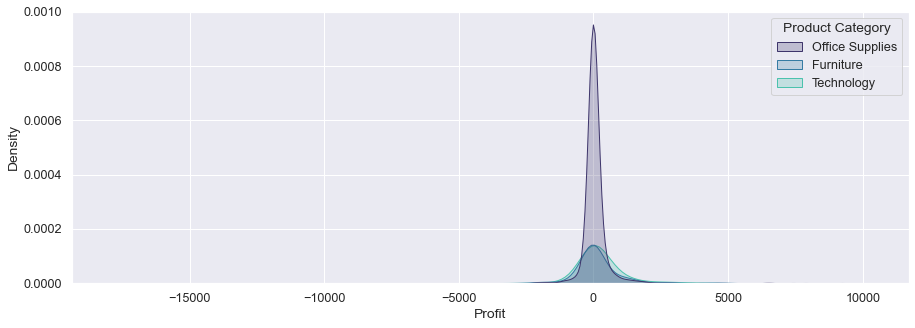

In [40]:
plt.figure(figsize = (15, 5)) 
sns.kdeplot(x = 'Profit', data = df, hue = 'Product Category', palette = 'mako', shade = True, warn_singular=False)

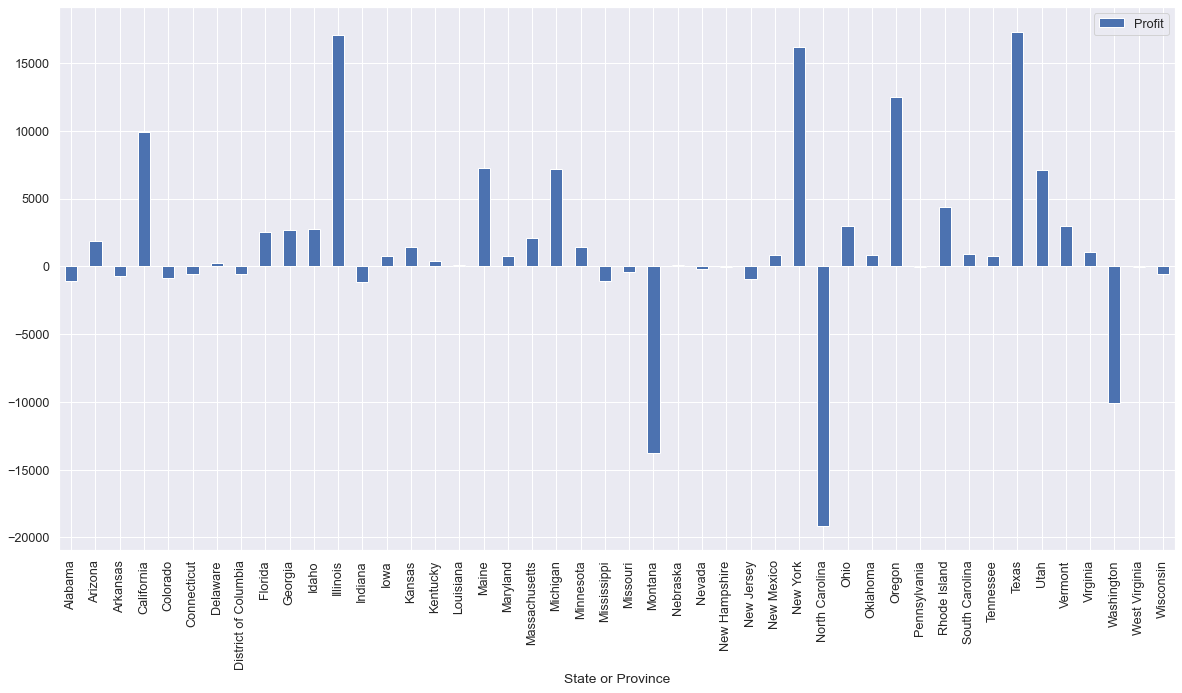

In [41]:
data = df[df['Product Category'] == 'Technology'][['State or Province', 'Profit']]
data = data.groupby('State or Province').sum()
data.plot(kind='bar',figsize=(20,10))
plt.show()

In [42]:
data1 = df[['State or Province', 'Profit']].groupby('State or Province').sum()
data1

,Profit
State or Province,
Alabama,-2418.056600
Arizona,3909.753832
Arkansas,-1184.747200
California,37421.960192
Colorado,6965.462660
Connecticut,-529.106300
Delaware,406.741800
District of Columbia,11677.363100
Florida,86.703840


<AxesSubplot:xlabel='State or Province'>

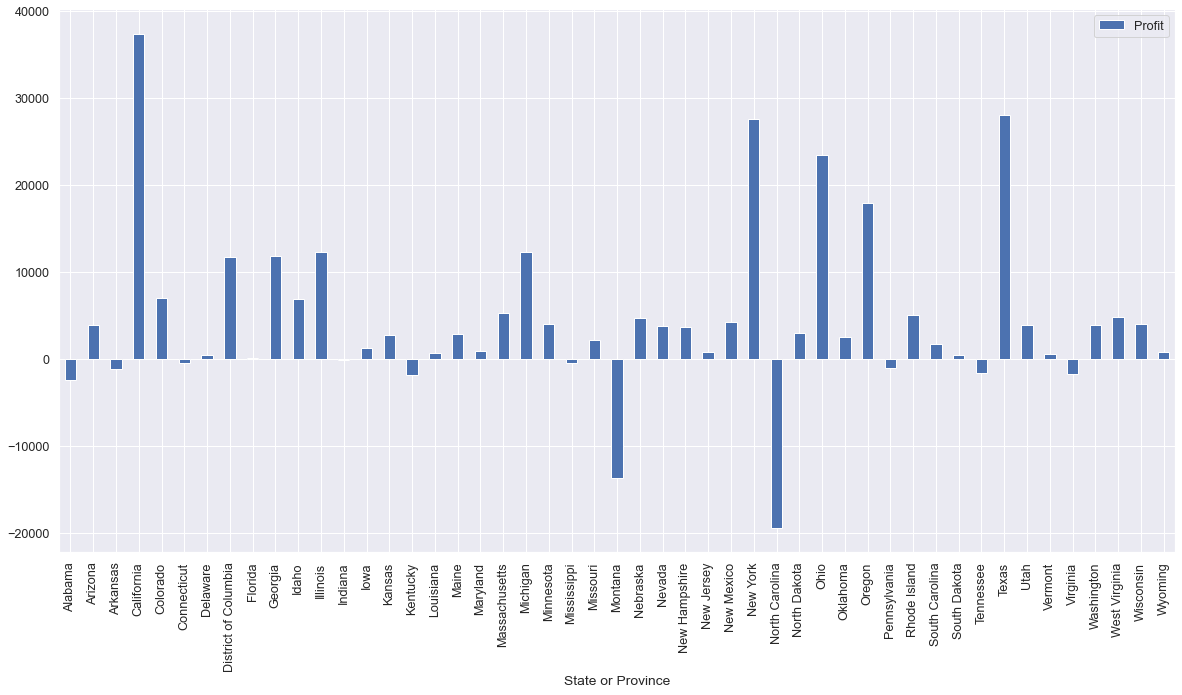

In [43]:
data1.plot(kind='bar',figsize=(20,10))

#### STATISTICAL ANALYSIS OF NUMERICAL COLUMNS:

In [44]:
df['Sales'].describe()

count     1952.000000
mean       985.828832
std       2559.900167
min          2.250000
25%         58.807500
50%        202.395000
75%        802.945000
max      45737.330000
Name: Sales, dtype: float64

In [45]:
df['Discount'].describe()

count    1952.000000
mean        0.048975
std         0.031378
min         0.000000
25%         0.020000
50%         0.050000
75%         0.080000
max         0.210000
Name: Discount, dtype: float64

In [46]:
df['Profit'].describe()

count     1952.000000
mean       114.793859
std       1141.112387
min     -16476.838000
25%        -84.485400
50%          1.476450
75%        116.201575
max       9228.225600
Name: Profit, dtype: float64

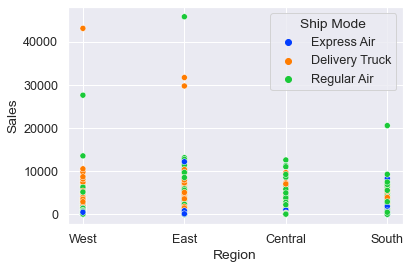

In [47]:
sns.scatterplot(
    x='Region',
    y='Sales', 
    data=df,
    palette='bright',
    hue='Ship Mode');

In [48]:
df['Month Name'] = df['Order Date'].dt.month_name()
df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Month Name
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,January
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,June
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,February
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,May
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,May


In [49]:
df['Month Name'].unique()

array(['January', 'June', 'February', 'May', 'April', 'March'],
      dtype=object)

<AxesSubplot:xlabel='Month Name'>

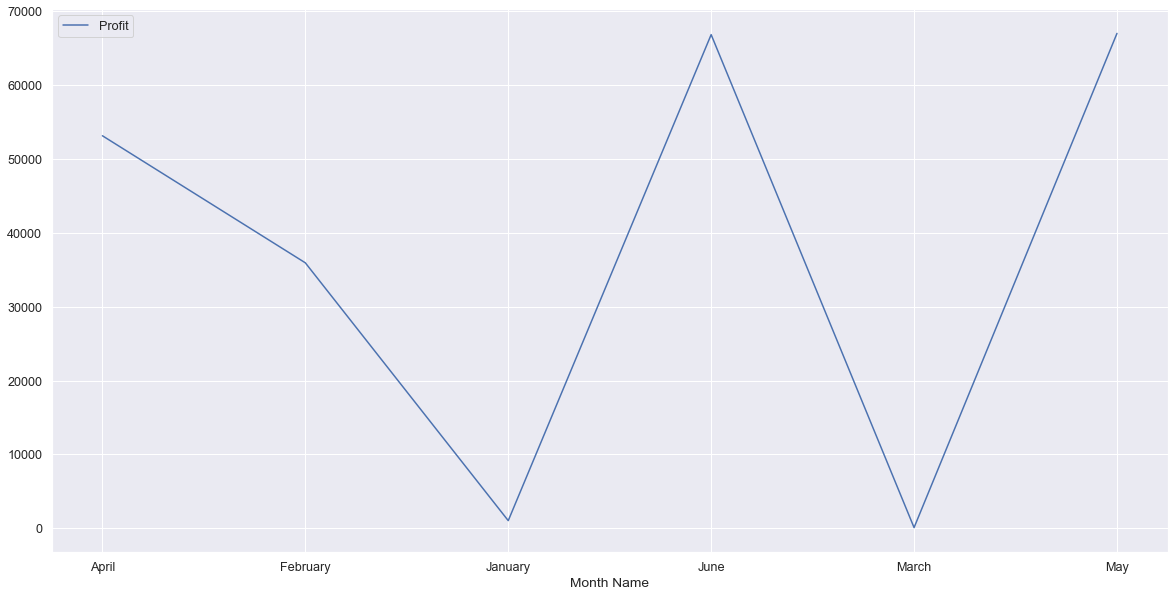

In [50]:
data2 = df[['Month Name', 'Profit']].groupby('Month Name').sum()
data2.plot(kind='line',figsize=(20,10))